# Consensus Motif # 
Find conserved patterns across multiple time series

Stumpy Tutorial Consenus Motif:
https://stumpy.readthedocs.io/en/latest/Tutorial_Consensus_Motif.html

Matrix Profile XV: ConsensusMotifs:
https://sites.google.com/site/consensusmotifs/

In [1]:
from core import utils

import stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
from core import visualize
from core import utils


## Eye-tracking (EOG) Dataset (MP XV) ##

Vertical Eye Position While Writing Different Japanese Sentences

From https://stumpy.readthedocs.io/en/latest/Tutorial_Consensus_Motif.html (in example: indices_sentences = [5, 6, 8, 9, 15, 23])

https://zenodo.org/record/4288978

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0192684

In [2]:
# Parameter
use_case = "consensusmotif"
data_name = "eog"
indices_sentences = [5, 6, 8, 9, 15, 23] # 0 to 24
experiment_name = "_".join([str(i) for i in indices_sentences])
target_w = 50  # Chosen since the eog signal was downsampled to 50 Hz
max_dilation = utils.calculate_max_d_from_target_w(target_w)

# load data
Ts_person1 = []
Ts_person2 = []
Ts_person3 = []
for i in indices_sentences:
    i += 1
    Ts_person1.append(pd.read_csv(f"../data/{use_case}/test1/EOG_001_01_{i:03d}.csv").iloc[:, 0].values)
    Ts_person2.append(pd.read_csv(f"../data/{use_case}/test2/EOG_002_01_{i:03d}.csv").iloc[:, 0].values)
    Ts_person3.append(pd.read_csv(f"../data/{use_case}/test3/EOG_003_01_{i:03d}.csv").iloc[:, 0].values)

# Parameter
Ts = Ts_person1

ground_truth = [
["u", "sa", "gi", "ga", "pi", "yo", "n", "pi", "yo", "n", "ha", "ne", "ru", "ho", "do"],
["hi", "to", "wa", "se", "L", "ni", "mu", "ka", "tsu", "te", "hi", "ra", "ka", "re"],
["i", "n", "pa", "ru", "se", "tsu", "o", "na", "ra", "be", "te", "mi", "ma", "shi", "ta"],
["bu", "ta", "i", "na", "ra", "bi", "to", "ka", "ha", "tsu", "se", "L", "re", "n", "shi", "yu", "L", "o", "shi", "te"],
["se", "n", "se", "L", "ga", "ka", "ta", "ru", "e", "mu", "ku", "n"],
["so", "re", "de", "e", "L", "ko", "n", "ka", "i", "no", "o", "L", "mo", "ku", "te", "ki", "wa", "a"],
["mo", "shi", "ku", "wa", "ho", "ka", "no", "hi", "to", "ni", "ko", "L", "ri", "ga", "a", "ru", "to", "su", "re", "ba"],
["ma", "i", "wa", "yu", "ru", "ka", "i", "ga", "L", "ha", "he", "L"],
["a", "no", "L", "be", "tsu", "no"],
["n", "a", "no", "ta", "be", "re", "ru", "no", "de"],
["de", "e", "L", "ko", "re", "de", "e", "L", "pe", "L", "zi", "sa", "n", "he", "mo", "do", "ru"],
["de", "so", "no", "o", "n", "ki", "yo", "L", "te", "ki", "ba", "i", "gu", "ra", "mu", "no", "ho", "L", "wa"],
["e", "sa", "ki", "ho", "do", "no", "e", "L", "re", "bu", "n", "pu", "no", "ke", "tsu", "ka", "ka", "ra"],
["ma", "zu", "ha", "i", "ke", "L", "to", "shi", "ma", "shi", "te", "wa", "re", "wa", "re", "wa"],
["ra", "n", "da", "mu", "ni"],
["no", "a", "no", "L", "hi", "to", "da", "ke", "na", "ra", "i", "za", "shi", "ra", "zu", "se", "ka", "i", "ni", "mo"],
["e", "L", "re", "L", "bu", "n", "no", "sa", "n", "zi", "yu", "L", "go", "da", "tsu", "shi", "yu"],
["mi", "gi", "mo", "hi", "da", "ri", "mo", "wa", "ka", "n", "na", "i", "to"],
["i", "tsu", "pa", "n", "ka", "ta", "i", "su", "L", "su", "pe", "ku", "to", "ru", "o", "mo", "chi", "L"],
["yo", "ri", "mu", "hi", "yo", "L", "no", "ka", "ko", "L", "shi", "ki", "ni", "go", "L", "ri", "yu", "L", "shi"],
["de", "su", "ga", "wa", "ta", "shi", "wa", "e", "wa", "to", "te", "mo", "he", "ta", "de", "su"],
["no", "n", "nu", "re", "te", "i", "na", "i", "be", "ta", "tsu", "ka", "na", "i"],
["ro", "L", "do", "ku", "bu", "n", "o", "i", "re", "ta", "mo", "no", "de", "su", "e", "L", "ko", "re", "wa"],
["hi", "zi", "yo", "L", "ni", "a", "n", "i", "ni", "su", "ma", "se", "ru", "tsu", "mo", "ri", "de", "de", "su", "ne"],
["ma", "so", "no", "pu", "ro", "se", "su", "wa", "ma", "L", "chi", "yo", "tsu", "to"]]

print("Max Dilation: " + str(max_dilation))
print("Same Japanese Characters in current selection:" + str(utils.find_common_strings([ground_truth[i] for i in indices_sentences])))


Max Dilation: 7
Same Japanese Characters in current selection:['a']


/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `ostinato(['Ts', 'm', 'd']) and function `aamp_ostinato(['Ts', 'm']) have different arguments/parameters.
  warnings.warn(msg)


Dilation=1, w=50: Best Radius 0.87 in ts 4 starting at 1270.


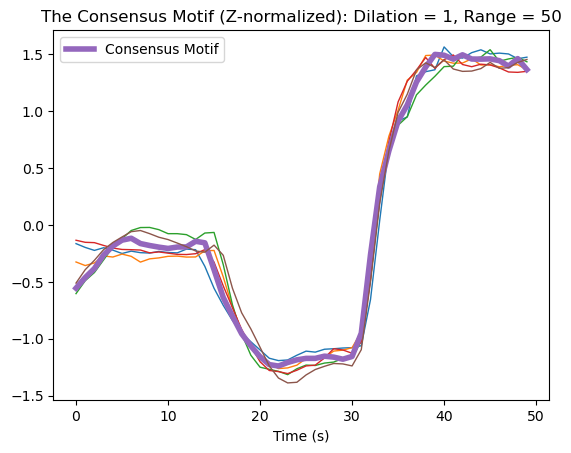

FileNotFoundError: [Errno 2] No such file or directory: '../results/consensusmotif/eog/5_6_8_9_15_23/5_6_8_9_15_23_d1_w50_snippet.png'

<Figure size 640x480 with 0 Axes>

In [3]:
# calculate and visualize
for d in range(1, max_dilation):
    m = round((target_w-1)/d) + 1
    actual_w = (m-1)*d + 1
    radius, Ts_idx, subseq_idx = stumpy.ostinato(Ts, m, d)
    print(f'Dilation={d}, w={actual_w}: Best Radius {np.round(radius, 2)} in ts {Ts_idx} starting at {subseq_idx}.') 
    # Best Radius: minimum distance between subsequence Ts_idx and its set of nearest neighbor of other time series. We refer to the time series subsequence with the smallest such radius as the time series consensus motif.
    visualize.consensusmotif(Ts, Ts_idx, subseq_idx, actual_w, d, data_name, experiment_name)
    